## Salary Prediction

### EDA

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("CAGEDMOV202207.txt", sep=";")
ocup = pd.read_excel('Layout-Caged.xlsx', sheet_name='cbo2002ocupação')


In [3]:
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202207,2,26,261160,N,8121400,-1,351305,101,7,...,0,0,"2403,79",7,0,1,202207,0,5,"2403,79"
1,202207,4,41,410400,P,8591100,-1,422105,101,7,...,0,0,"1524,60",1,0,1,202207,0,5,"1524,60"
2,202207,2,25,250400,G,4691500,1,784105,101,7,...,0,1,"826,50",7,0,1,202207,0,5,"826,50"
3,202207,4,41,412550,H,4930202,-1,783215,101,5,...,0,0,"1871,40",7,0,1,202207,0,5,"1871,40"
4,202207,3,35,352010,C,2861500,1,724410,101,7,...,0,0,"2524,45",6,0,1,202207,0,1,"11,62"


In [4]:
ocup.head()

,Código,Descrição
0,10105,Oficial General da Aeronautica
1,10110,Oficial General do Exercito
2,10115,Oficial General da Marinha
3,10205,Oficial da Aeronautica
4,10210,Oficial do Exercito


In [3]:
df = pd.merge(df, ocup, left_on='cbo2002ocupação', right_on='Código', how='inner',indicator=False).drop(columns = ['Código'])

In [6]:
df.sample(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2198318,202207,3,35,354660,A,131800,1,622505,999,5,...,0,"545,45",7,0,2,202207,0,5,"545,45",Trabalhador no Cultivo de Arvores Frutiferas
1972209,202207,3,35,355030,N,8129000,1,622010,101,7,...,0,"1321,42",1,0,1,202207,0,5,"1321,42",Jardineiro
68309,202207,3,35,350160,G,4711302,1,784105,101,7,...,0,"1215,00",7,0,1,202207,0,5,"1215,00","Embalador, a Mao"
559644,202207,3,33,330500,M,7112000,-1,999999,103,7,...,9,"602,97",9,1,1,202207,0,5,"602,97",Não Identificado
2912393,202207,4,43,431350,C,1533500,-1,764005,101,4,...,0,"1370,60",10,0,1,202207,0,1,"6,23",Trabalhador Polivalente da Confeccao de Calcados


In [4]:
# Filtros (uf = SP | município = São Paulo | CBO = 212 [Aréas relacionadas a tecnologia])
df = df[(df.uf == 35) & (df.município == 355030) & (df.cbo2002ocupação.isin([212205, 212210, 212215, 212305, 212310, 212315, 212320, 212405, 212410, 212415, 212420, 212425, 212430]))]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,"5000,00",5,0,1,202207,0,5,"5000,00",Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,"8600,00",10,0,1,202207,0,5,"8600,00",Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,"5153,59",7,0,1,202207,0,5,"5153,59",Analista de Sistemas de Automacao


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 2351401 to 3531670
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competênciamov          8936 non-null   int64  
 1   região                  8936 non-null   int64  
 2   uf                      8936 non-null   int64  
 3   município               8936 non-null   int64  
 4   seção                   8936 non-null   object 
 5   subclasse               8936 non-null   int64  
 6   saldomovimentação       8936 non-null   int64  
 7   cbo2002ocupação         8936 non-null   int64  
 8   categoria               8936 non-null   int64  
 9   graudeinstrução         8936 non-null   int64  
 10  idade                   8936 non-null   float64
 11  horascontratuais        8935 non-null   object 
 12  raçacor                 8936 non-null   int64  
 13  sexo                    8936 non-null   int64  
 14  tipoempregador          8936 no

In [9]:
df.shape

(8936, 29)

In [5]:
(df.isna().sum() / len(df)) * 100

competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.000000
horascontratuais          0.011191
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.000000
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo          0.000000
Descrição           

In [8]:
df['horascontratuais'].isnull().sum()

0

In [7]:
# Fill NaN values by MODE

df['horascontratuais'].fillna(df['horascontratuais'].value_counts().idxmax() , axis=0 ,inplace=True)

In [9]:
df['salário'] = df['salário'].str.replace(',','.').astype(float)
df['valorsaláriofixo'] = df['valorsaláriofixo'].str.replace(',','.').astype(float)
df['horascontratuais'] = df['horascontratuais'].str.replace(',','.').astype(float)

In [ ]:
list(df.select_dtypes(exclude='object').columns)

['competênciamov',
 'região',
 'uf',
 'município',
 'subclasse',
 'saldomovimentação',
 'cbo2002ocupação',
 'categoria',
 'graudeinstrução',
 'idade',
 'horascontratuais',
 'raçacor',
 'sexo',
 'tipoempregador',
 'tipoestabelecimento',
 'tipomovimentação',
 'tipodedeficiência',
 'indtrabintermitente',
 'indtrabparcial',
 'salário',
 'tamestabjan',
 'indicadoraprendiz',
 'origemdainformação',
 'competênciadec',
 'indicadordeforadoprazo',
 'unidadesaláriocódigo',
 'valorsaláriofixo']

In [10]:
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,5000.00,5,0,1,202207,0,5,5000.00,Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,8600.00,10,0,1,202207,0,5,8600.00,Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,5153.59,7,0,1,202207,0,5,5153.59,Analista de Sistemas de Automacao


In [11]:
pd.DataFrame({'Columns': df.nunique().index , 'Number of unique values':  df.nunique().values})

,Columns,Number of unique values
0,competênciamov,1
1,região,1
2,uf,1
3,município,1
4,seção,19
5,subclasse,329
6,saldomovimentação,2
7,cbo2002ocupação,13
8,categoria,6
9,graudeinstrução,11


In [12]:
# Grouping graudeinstrução 2: "Até 5ª Incompleto", 3: "5ª Completo Fundamental", 4: "6ª a 9ª Fundamental", 5: "Fundamental Completo", 6: "Médio Incompleto" em médio incompleto

df["graudeinstrução"] = df["graudeinstrução"].replace([2, 3, 4, 5, 6], 2)

df[["graudeinstrução"]].value_counts(sort = False) # Checking the frequency

graudeinstrução
1                     8
2                    62
7                  1211
8                  1558
9                  5002
10                  143
11                   44
80                  908
dtype: int64

In [13]:
var_quant = [
    "idade", 
    "horascontratuais", 
    "salário", 
    "valorsaláriofixo"]

var_qua = [
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "unidadesaláriocódigo"
]

var_quali = [
    "região",
    "uf",
    "município",
    "seção",
    "subclasse",
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "competênciadec",
    "competênciaexc",
    "indicadordeexclusão",
    "indicadordeforadoprazo",
    "unidadesaláriocódigo"
]

label_quali = {
  "sexo": {1: 'M', 3: 'F', 9: 'Não Identificado'},
  "raçacor": {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não informada', 9: 'Não Identificado'},
  "graudeinstrução": {1: "Analfabeto", 2: "Médio Incompleto", 7: "Médio Completo", 8: "Superior Incompleto", 9: "Superior Completo", 10: "Mestrado", 11: "Doutorado", 80: "Pós completa", 99: "Não Identificado"},
  
}

In [14]:
# unidadesaláriocódigo = 5 [Monthly Wage] 15 = [Hour] 1 = [N/A]  )
df.unidadesaláriocódigo.value_counts()

5     8920
1       15
99       1
Name: unidadesaláriocódigo, dtype: int64

In [15]:
# Filtering (unidadesaláriocódigo = 5 [Monthly Wage])
df = df[(df.unidadesaláriocódigo == 5)]
df.unidadesaláriocódigo.value_counts()

5    8920
Name: unidadesaláriocódigo, dtype: int64

In [9]:
cat = list(df.select_dtypes(include='object').columns)
num  = list(df.select_dtypes(exclude='object').columns)
ordering = num + cat 
df = df[ordering]

In [10]:
# Exporting dataset to csv file to simply the process 
df.to_csv('cagedmov202207.csv')

In [16]:
def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

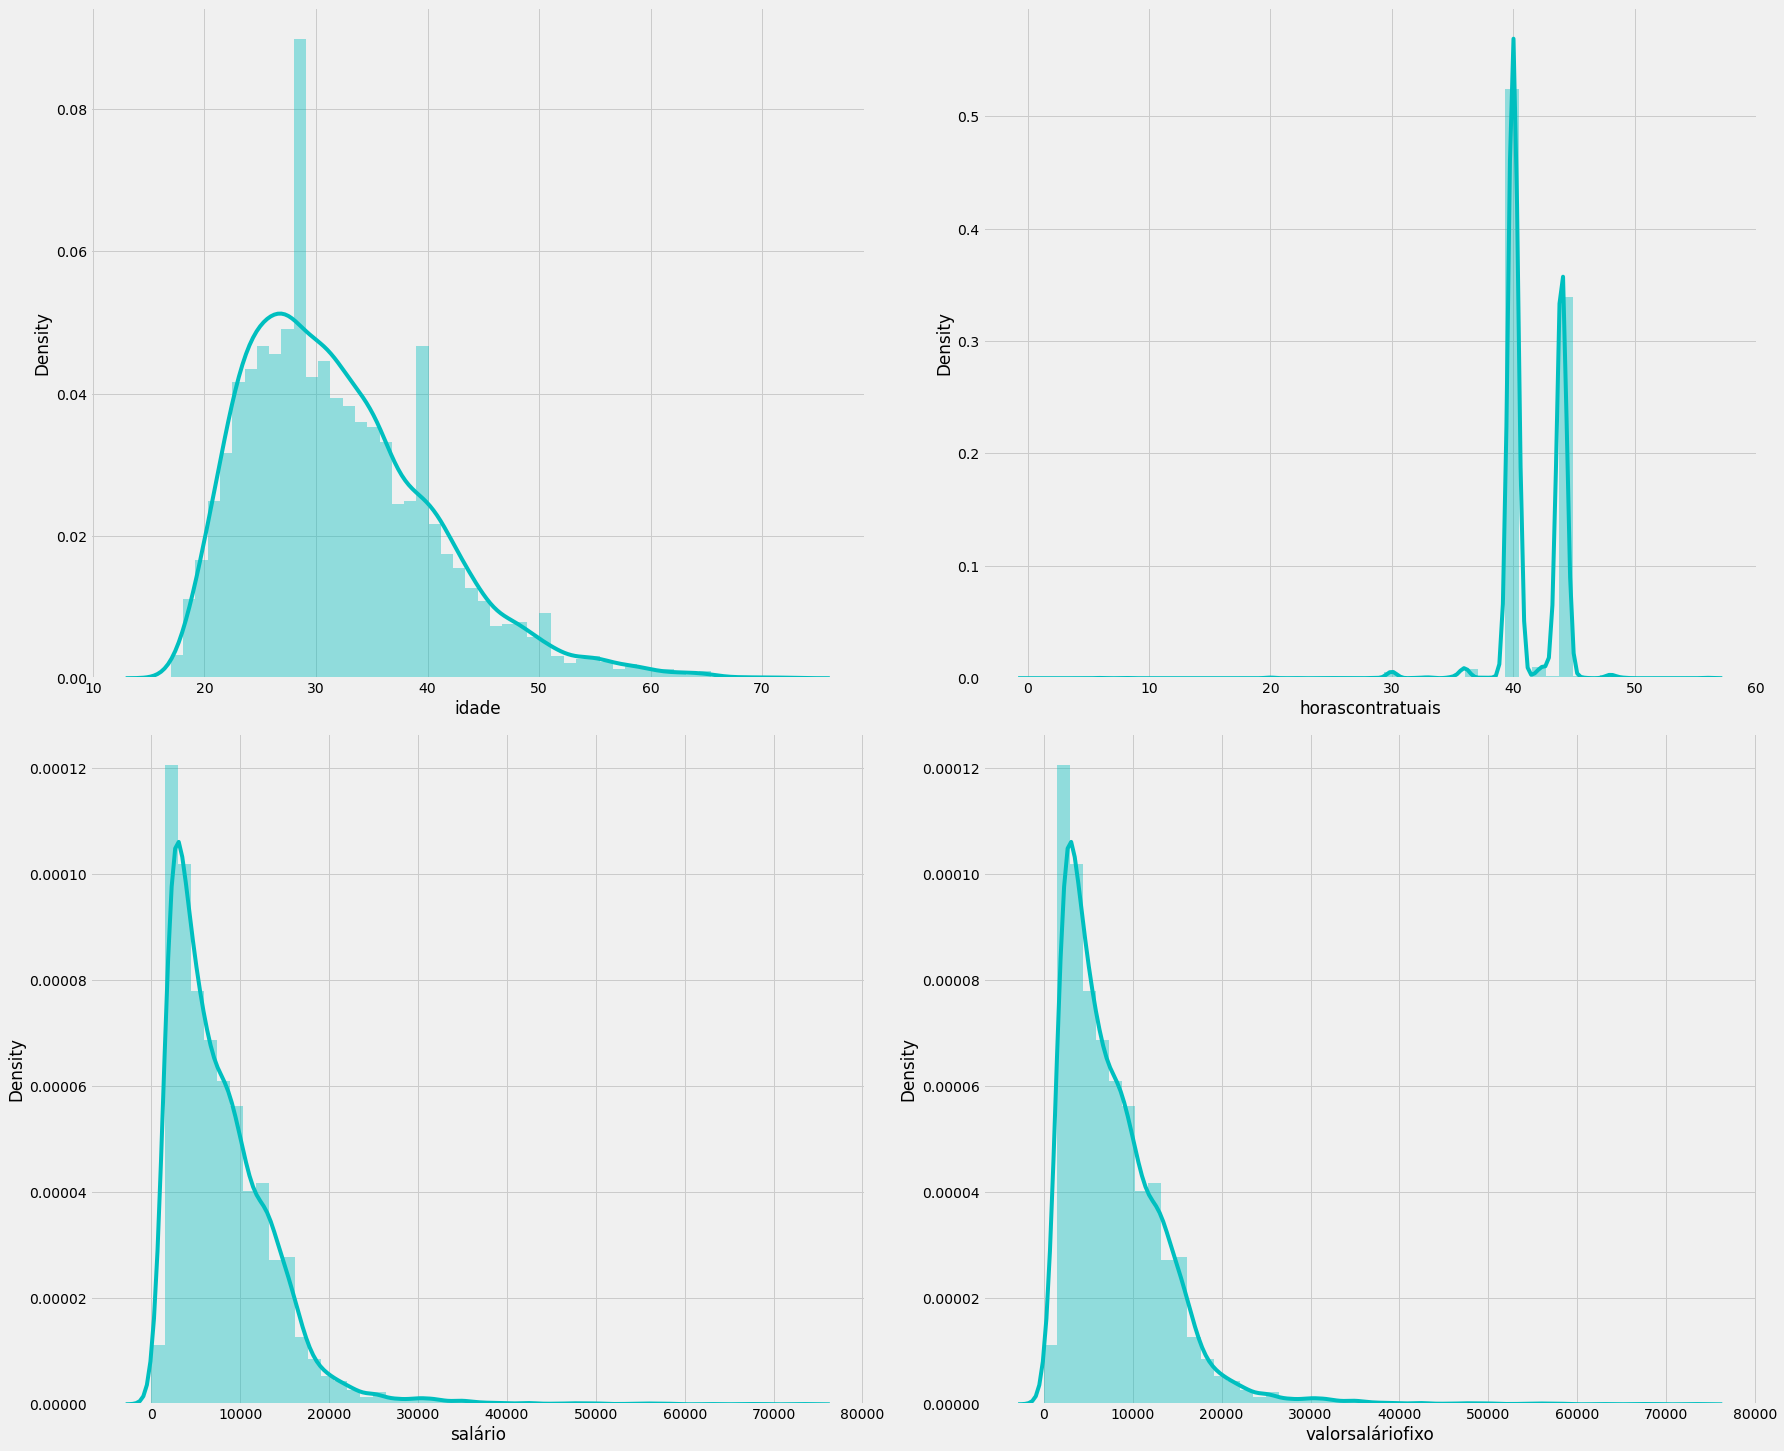

In [17]:
generate_plot(df[var_quant],4,2)

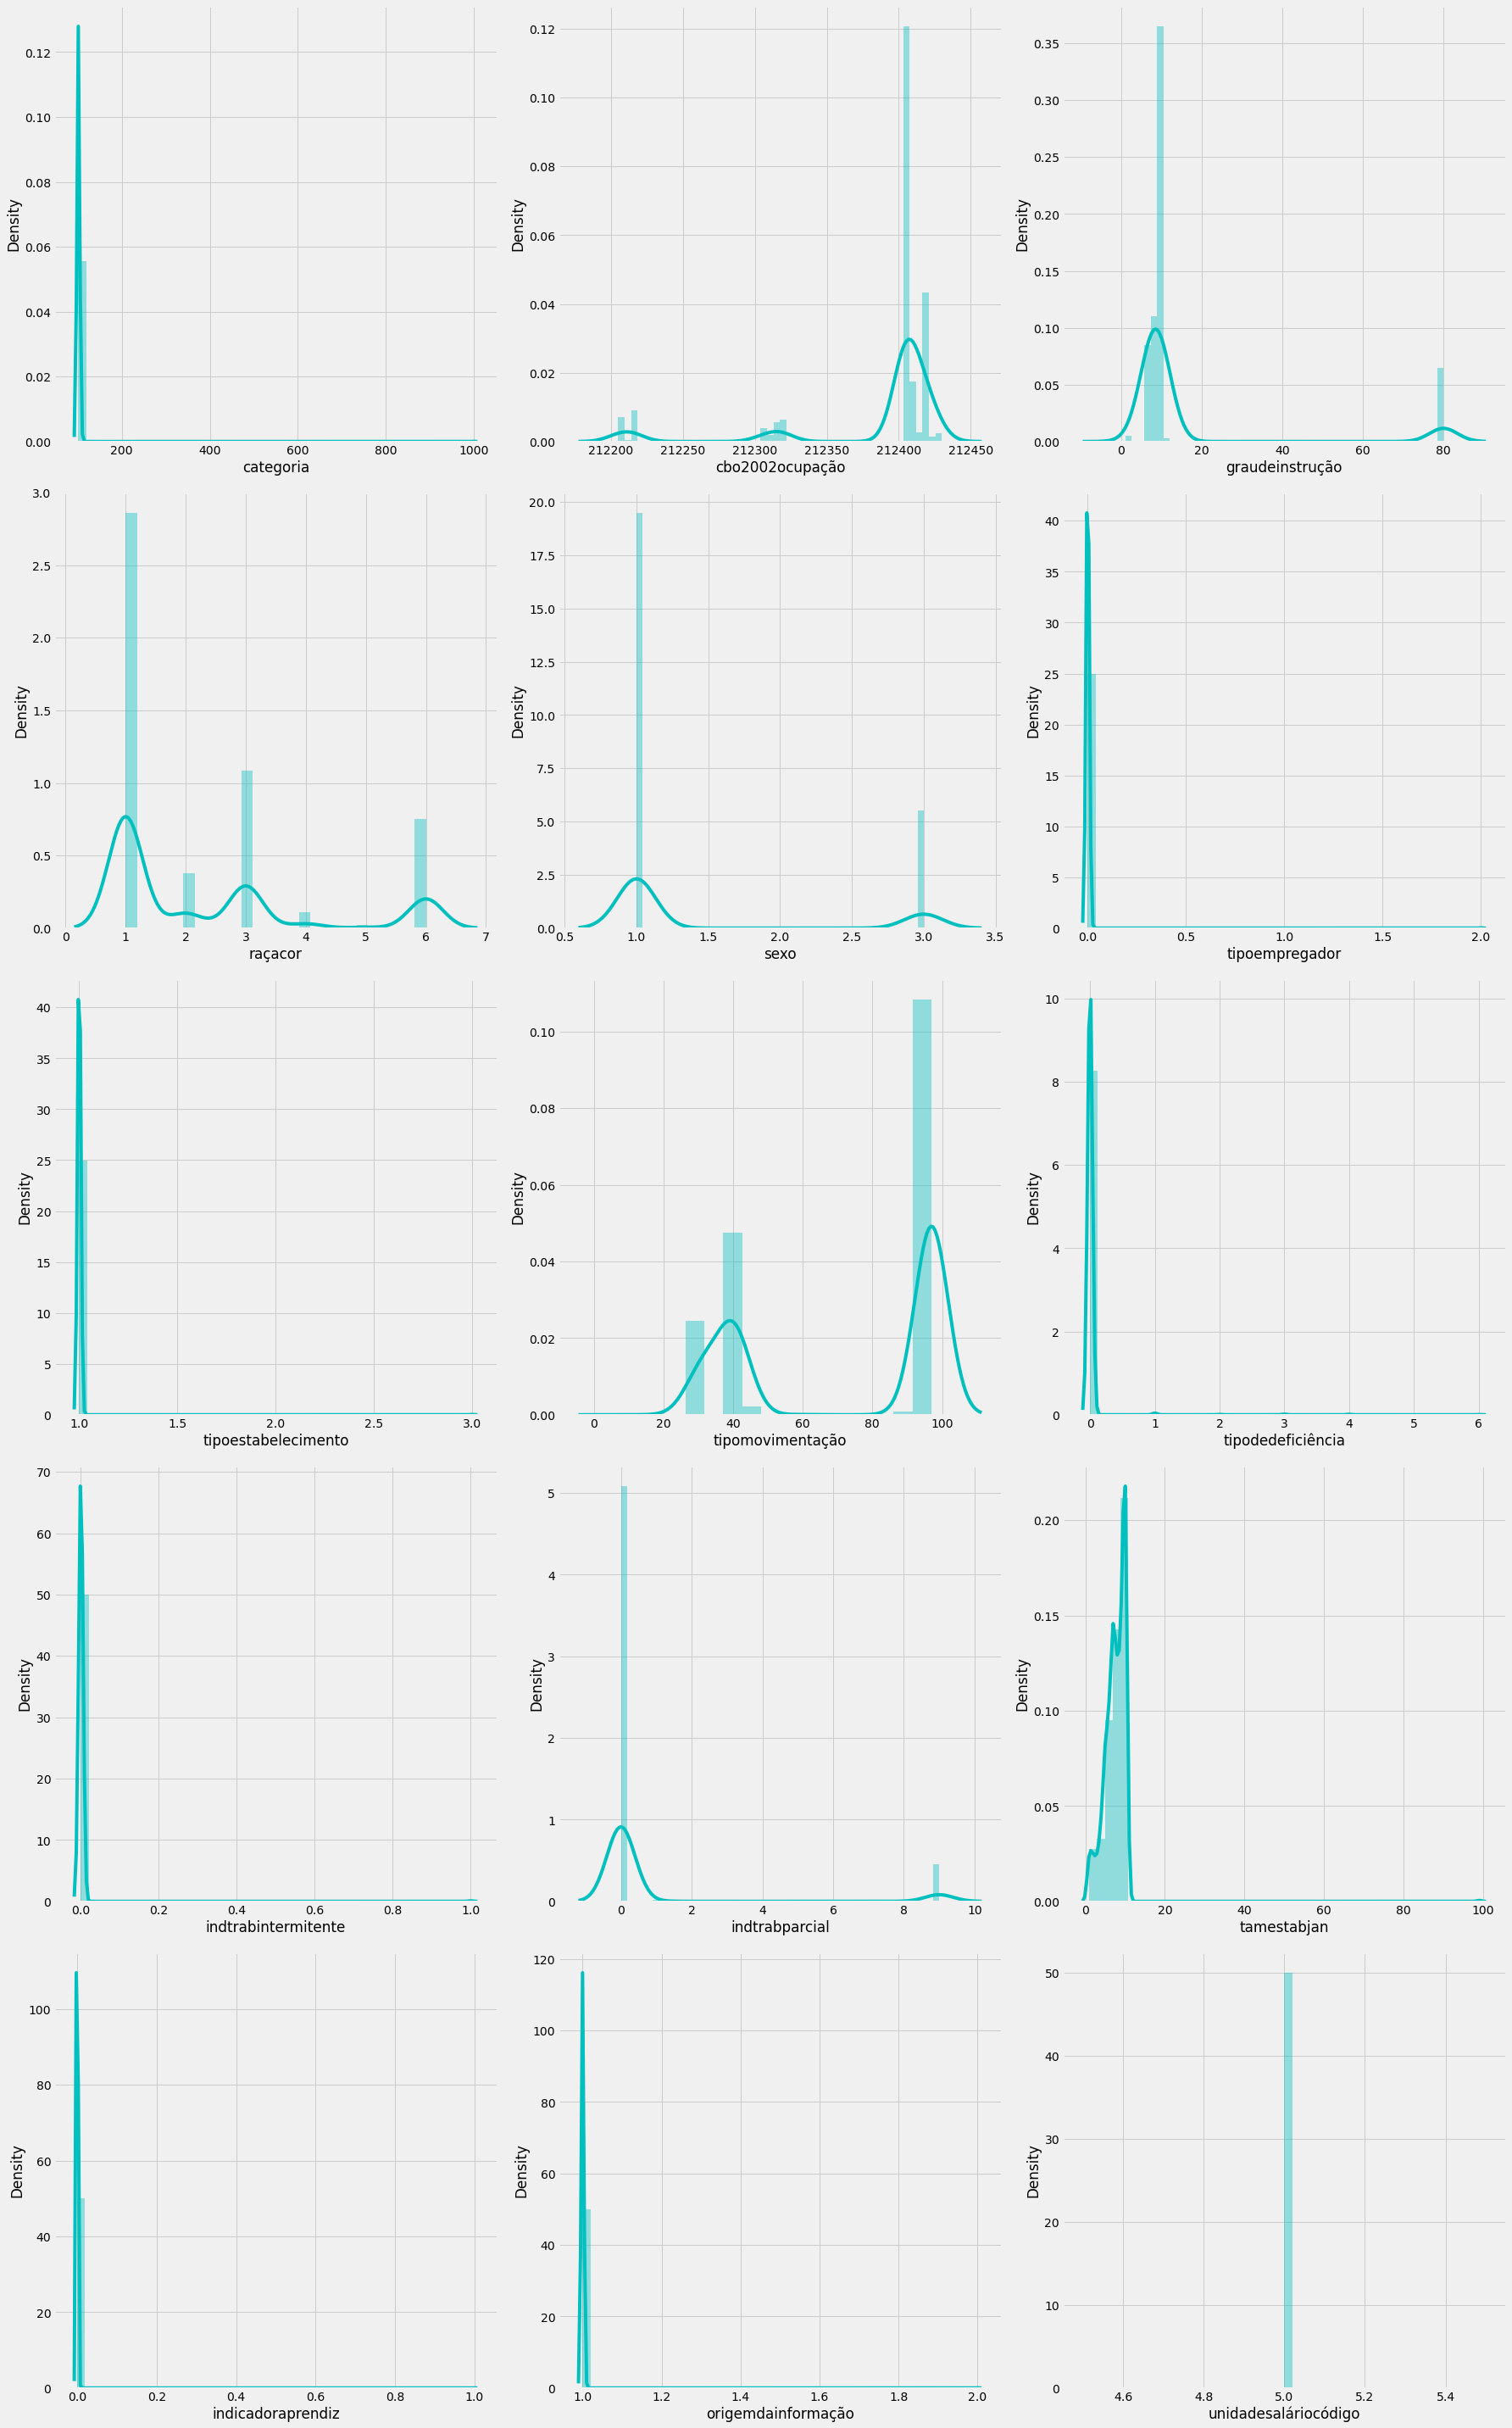

In [21]:
generate_plot(df[var_qua],5,3)

In [19]:
df[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
idade,8920.0,32.02,8.35,17.00,26.0,31.00,37.00,48.0,57.00,72.00
horascontratuais,8920.0,41.43,2.51,0.44,40.0,40.00,44.00,44.0,44.00,56.00
salário,8920.0,7853.78,5973.76,0.00,3500.0,6474.06,10781.41,17500.0,29526.04,73425.04
valorsaláriofixo,8920.0,7853.78,5973.76,0.00,3500.0,6474.06,10781.41,17500.0,29526.04,73425.04


In [22]:
# Employment category 101 = [CLT] 106 = [Temporary]
df.categoria.value_counts()

101    8783
106      71
105      49
111      11
999       4
103       2
Name: categoria, dtype: int64

In [23]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [196]:
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [24]:
# Boxplot function

def grafico_boxplot(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(y="valorsaláriofixo", x=variable, data=data, palette='viridis')
    plt.ylabel(label)
    plt.xticks(rotation = 90)
    plt.show()

In [25]:
# Barplot function

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = True)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", palette='viridis'))

    plt.ylim(0,1)
    plt.xticks(rotation = 90)
    plt.show()

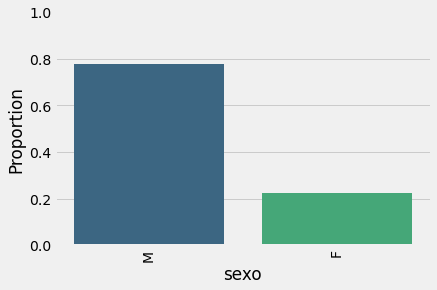

In [119]:
grafico_barras_prop(df.replace(label_quali), variable = "sexo")

<AxesSubplot:xlabel='valorsaláriofixo'>

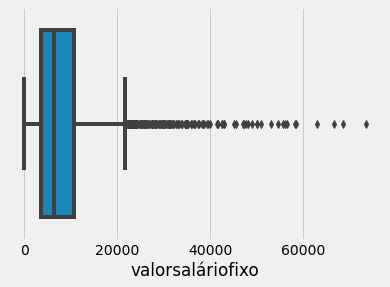

In [26]:
sns.boxplot(x=df.valorsaláriofixo)

In [27]:
df.nlargest(n=5, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
3435944,202207,3,35,355030,N,7810800,-1,212215,101,9,...,0,73425.04,6,0,1,202207,0,5,73425.04,Engenheiros de Sistemas Operacionais em Comput...
3436273,202207,3,35,355030,N,7810800,1,212215,101,9,...,0,68474.00,6,0,1,202207,0,5,68474.00,Engenheiros de Sistemas Operacionais em Comput...
3435854,202207,3,35,355030,N,7810800,1,212215,101,8,...,0,66561.25,6,0,1,202207,0,5,66561.25,Engenheiros de Sistemas Operacionais em Comput...
3436038,202207,3,35,355030,N,7810800,1,212215,101,7,...,0,62920.66,6,0,1,202207,0,5,62920.66,Engenheiros de Sistemas Operacionais em Comput...
3358290,202207,3,35,355030,J,6204000,1,212425,101,9,...,0,58300.00,2,0,1,202207,0,5,58300.00,Arquiteto De Soluções De Tecnologia Da Informação


In [26]:
df.nsmallest(n=5, columns=['valorsaláriofixo'])

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2444877,202207,3,35,355030,M,7319003,1,212420,101,8,...,0,0.0,7,0,1,202207,0,5,0.0,Analista de Suporte Computacional
2604178,202207,3,35,355030,J,6209100,1,212405,101,9,...,0,0.0,5,0,1,202207,0,5,0.0,Analista de Desenvolvimento de Sistemas
3435907,202207,3,35,355030,N,7810800,1,212215,101,9,...,0,0.0,7,0,1,202207,0,5,0.0,Engenheiros de Sistemas Operacionais em Comput...
3435998,202207,3,35,355030,N,7810800,1,212215,101,9,...,0,0.0,7,0,1,202207,0,5,0.0,Engenheiros de Sistemas Operacionais em Comput...
3436061,202207,3,35,355030,N,7810800,1,212215,101,8,...,0,0.0,7,0,1,202207,0,5,0.0,Engenheiros de Sistemas Operacionais em Comput...


In [27]:
df['valorsaláriofixo'].value_counts()[0]

11

In [28]:
# Interquartile range to detect outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "valorsaláriofixo")
print("Upper limit: ", upper)
print("Lower Limit: ", lower)

Upper limit:  21703.531249999996
Lower Limit:  -7422.118749999998


In [29]:
# Standard deviation to detect outliers
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(df, "valorsaláriofixo")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  25775.06466129261
Lower Limit:  -10067.506136628883


In [32]:
df[(df['valorsaláriofixo'] < lower_limit) | (df['valorsaláriofixo'] > upper_limit)]

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,5000.00,5,0,1,202207,0,5,5000.00,Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,8600.00,10,0,1,202207,0,5,8600.00,Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,5153.59,7,0,1,202207,0,5,5153.59,Analista de Sistemas de Automacao
2351427,202207,3,35,355030,G,4642701,1,212415,101,7,...,0,3000.00,3,0,1,202207,0,5,3000.00,Analista de Sistemas de Automacao
2351448,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,7500.00,9,0,1,202207,0,5,7500.00,Analista de Sistemas de Automacao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531646,202207,3,35,355030,J,6204000,1,212310,101,9,...,0,2500.00,10,0,1,202207,0,5,2500.00,Administrador de Redes
3531655,202207,3,35,355030,J,6209100,1,212310,101,8,...,0,2033.60,2,0,1,202207,0,5,2033.60,Administrador de Redes
3531664,202207,3,35,355030,N,8211300,1,212310,101,9,...,0,15000.00,7,0,1,202207,0,5,15000.00,Administrador de Redes
3531669,202207,3,35,355030,O,8411600,1,212310,101,9,...,0,6494.46,9,0,1,202207,0,5,6494.46,Administrador de Redes


In [30]:
# Filtering salary values >= R$ 1212 Brazilian Minimal Wage & <= upper
df = df[(df.valorsaláriofixo >= 1212) & (df['valorsaláriofixo'] < upper)]
df.head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
2351401,202207,3,35,355030,J,6201501,1,212415,101,9,...,0,5000.00,5,0,1,202207,0,5,5000.00,Analista de Sistemas de Automacao
2351413,202207,3,35,355030,J,6204000,1,212415,101,9,...,0,8600.00,10,0,1,202207,0,5,8600.00,Analista de Sistemas de Automacao
2351418,202207,3,35,355030,J,6201501,-1,212415,101,8,...,0,5153.59,7,0,1,202207,0,5,5153.59,Analista de Sistemas de Automacao


In [31]:
df.shape

(8663, 29)

<AxesSubplot:xlabel='valorsaláriofixo'>

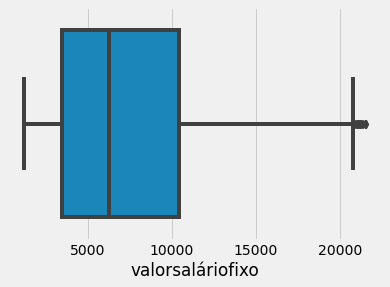

In [32]:
sns.boxplot(x=df.valorsaláriofixo)

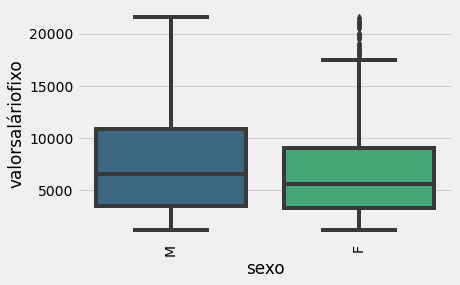

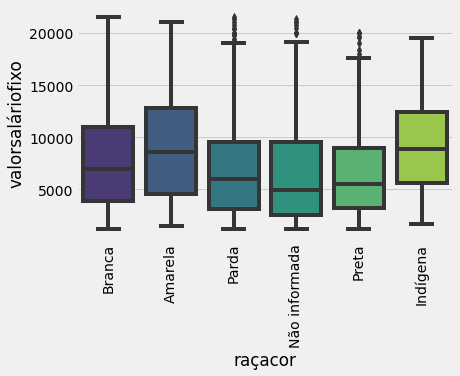

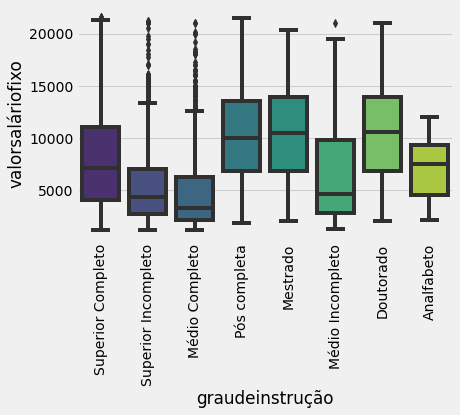

In [33]:
grafico_boxplot(df.replace(label_quali), "sexo", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "raçacor", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "graudeinstrução", "valorsaláriofixo")

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='idade'>

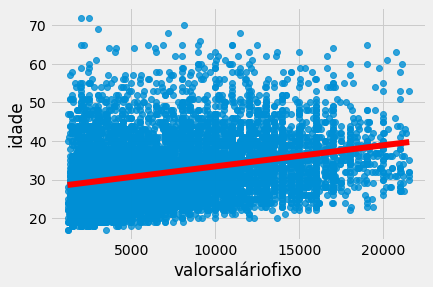

In [34]:
sns.regplot(x=df.valorsaláriofixo , y=df.idade, line_kws={'color': 'red'})

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='graudeinstrução'>

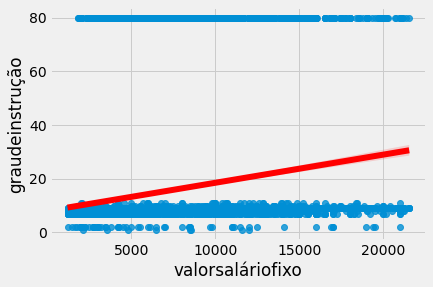

In [28]:
sns.regplot(x=df.valorsaláriofixo , y=df.graudeinstrução, line_kws={'color': 'red'})

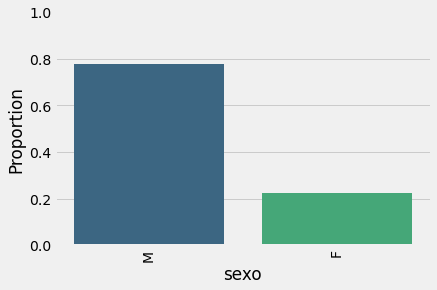

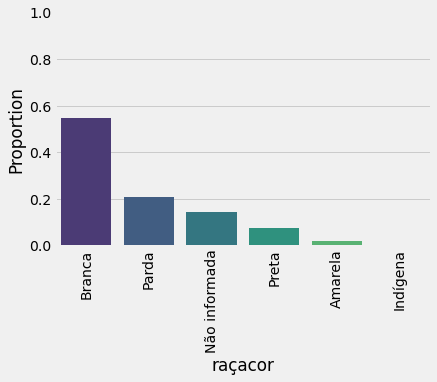

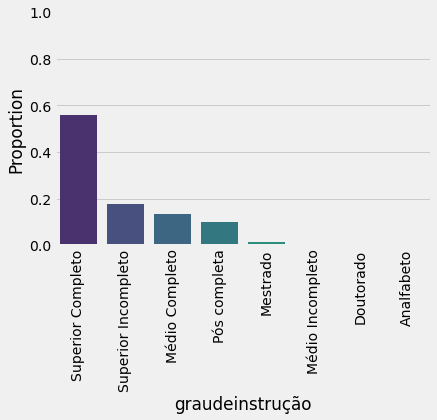

In [35]:
grafico_barras_prop(df.replace(label_quali), variable = "sexo")
grafico_barras_prop(df.replace(label_quali), variable = "raçacor")
grafico_barras_prop(df.replace(label_quali), variable = "graudeinstrução")

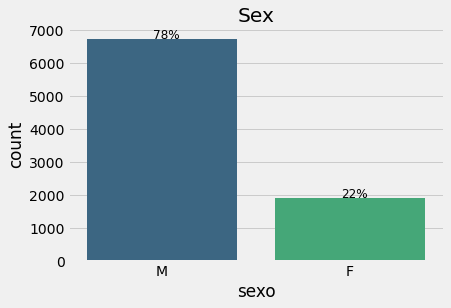

In [36]:
ax = sns.countplot( x=df.replace(label_quali).sexo , data= df, palette='viridis')
ax.set_title('Sex')
percen(ax , df.sexo)

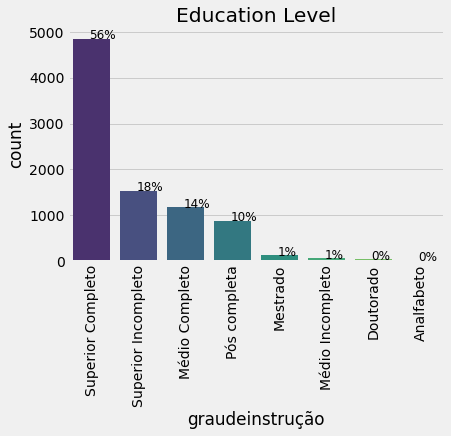

In [45]:
ax = sns.countplot( x=df.replace(label_quali).graudeinstrução , data= df , palette='viridis')
ax.set_title('Education Level')
plt.xticks(rotation = 90)
percen(ax , df.graudeinstrução)


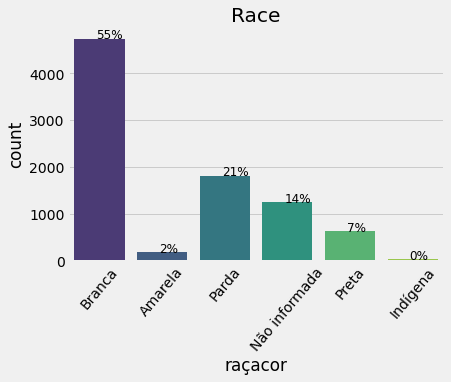

In [37]:
ax = sns.countplot( x=df.replace(label_quali).raçacor , data= df , palette='viridis')
ax.set_title('Race')
plt.xticks(rotation = 50)
percen(ax , df.raçacor)

In [34]:
df.raçacor.value_counts()

1    4744
3    1815
6    1248
2     635
4     185
5      36
Name: raçacor, dtype: int64

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

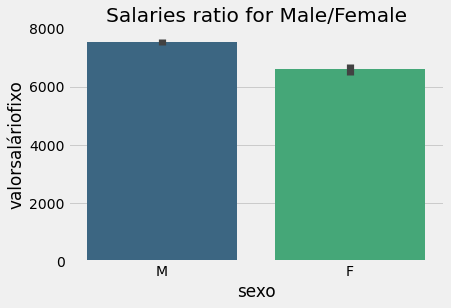

In [44]:
ax = sns.barplot(data=df.replace(label_quali), x="sexo", y="valorsaláriofixo", palette='viridis')
ax.set_title('Salaries ratio for Male/Female')

<AxesSubplot:title={'center':'Average Salary by Race'}, xlabel='raçacor', ylabel='valorsaláriofixo'>

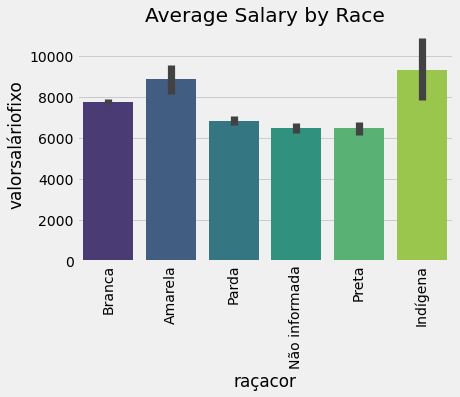

In [106]:
plt.title('Average Salary by Race')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali), x="raçacor", y="valorsaláriofixo", palette='viridis')

<AxesSubplot:title={'center':'Average Salary by Education Level'}, xlabel='graudeinstrução', ylabel='valorsaláriofixo'>

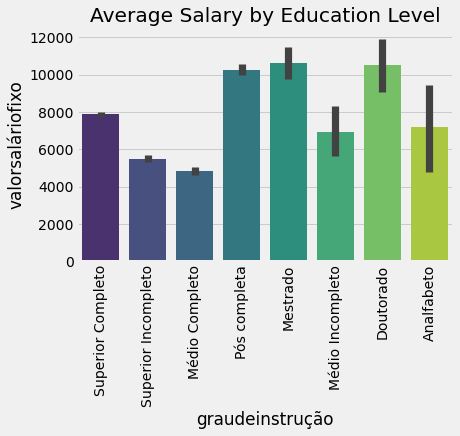

In [105]:
plt.title('Average Salary by Education Level')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali),  x="graudeinstrução", y="valorsaláriofixo", palette='viridis')

<AxesSubplot:xlabel='valorsaláriofixo'>

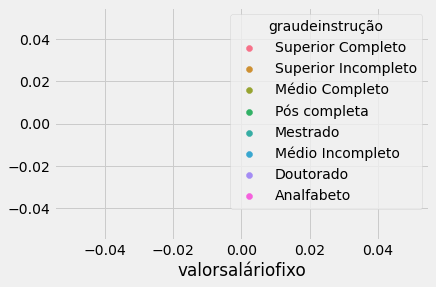

In [57]:
sns.scatterplot(data=df.replace(label_quali), x="valorsaláriofixo",  hue="graudeinstrução")

In [110]:
pd.DataFrame({'Education Level': df.replace(label_quali).groupby('graudeinstrução')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Education Level,Mean salary
5,Pós completa,10620.47
6,Superior Completo,10488.64
7,Superior Incompleto,10269.20
4,Médio Incompleto,7874.66
0,Analfabeto,7204.82
1,Doutorado,6919.84
3,Médio Completo,5477.05
2,Mestrado,4831.62


In [58]:
df.replace(label_quali).graudeinstrução.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Superior Completo       55.9 %
Superior Incompleto    17.77 %
Médio Completo         13.53 %
Pós completa           10.07 %
Mestrado                1.45 %
Médio Incompleto        0.72 %
Doutorado               0.47 %
Analfabeto              0.09 %
Name: graudeinstrução, dtype: object

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='Density'>

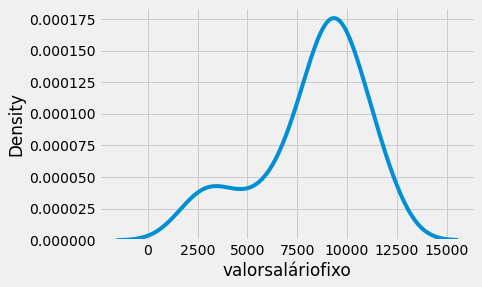

In [215]:
sns.kdeplot(df.groupby('idade')['valorsaláriofixo'].mean().round(2), x=df.idade)

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='Density'>

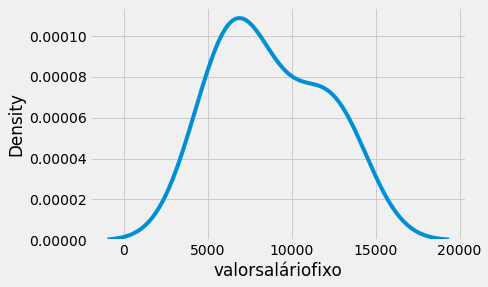

In [218]:
sns.kdeplot(df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2), x=df.graudeinstrução)

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='Density'>

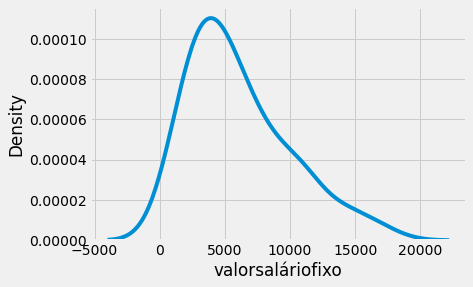

In [59]:
sns.kdeplot(df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2), x=df.graudeinstrução)

<AxesSubplot:>

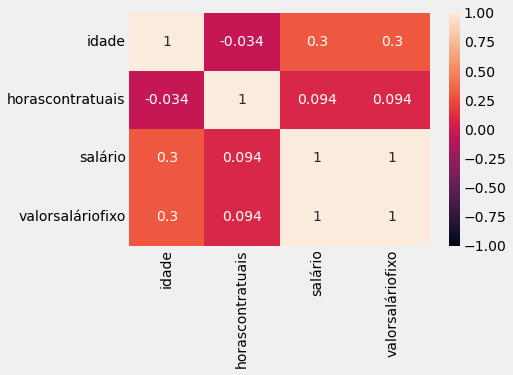

In [37]:
sns.heatmap(data=df[var_quant].corr(), annot=True, vmin=-1, vmax=1 )

<AxesSubplot:>

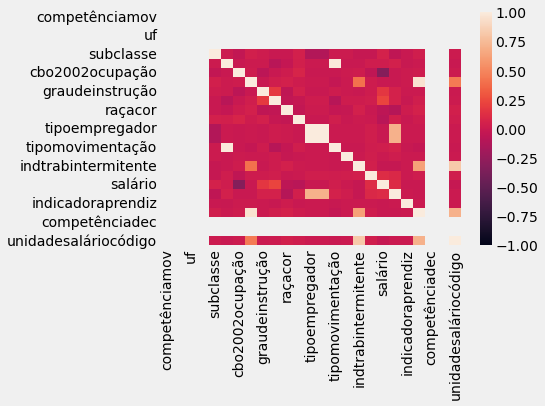

In [22]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

In [42]:
pd.DataFrame({'Age': df.groupby('idade')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('idade')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]


,Age,Mean salary
43,60.0,11866.87
46,63.0,11371.97
45,62.0,11257.61
44,61.0,11180.43
42,59.0,10666.10
41,58.0,10458.10
36,53.0,10017.96
28,45.0,9913.82
22,39.0,9658.93
33,50.0,9487.41


<AxesSubplot:title={'center':'Occupattion'}, xlabel='Descrição', ylabel='valorsaláriofixo'>

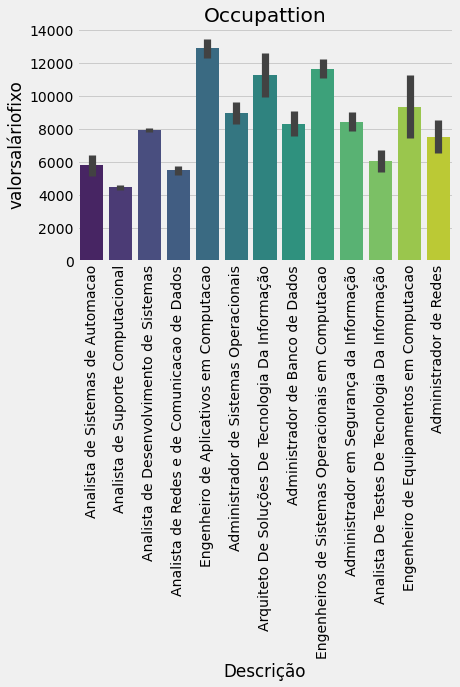

In [50]:
plt.xticks(rotation = 90)
plt.title('Occupattion')
sns.barplot(data=df.replace(label_quali), x="Descrição", y="valorsaláriofixo", palette='viridis')

In [40]:
pd.DataFrame({'Occupattion': df.groupby('Descrição')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('Descrição')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
10,Engenheiro de Aplicativos em Computacao,12913.05
12,Engenheiros de Sistemas Operacionais em Comput...,11654.87
9,Arquiteto De Soluções De Tecnologia Da Informação,11244.81
11,Engenheiro de Equipamentos em Computacao,9309.97
2,Administrador de Sistemas Operacionais,8933.11
3,Administrador em Segurança da Informação,8409.05
0,Administrador de Banco de Dados,8290.23
5,Analista de Desenvolvimento de Sistemas,7907.17
1,Administrador de Redes,7489.98
4,Analista De Testes De Tecnologia Da Informação,6047.78


In [117]:
df.Descrição.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Analista de Desenvolvimento de Sistemas               55.44 %
Analista de Suporte Computacional                     19.49 %
Analista de Redes e de Comunicacao de Dados            7.91 %
Engenheiros de Sistemas Operacionais em Computacao     3.31 %
Administrador em Segurança da Informação               2.87 %
Engenheiro de Aplicativos em Computacao                2.77 %
Administrador de Sistemas Operacionais                  2.5 %
Administrador de Banco de Dados                        1.75 %
Analista de Sistemas de Automacao                      1.19 %
Analista De Testes De Tecnologia Da Informação         1.14 %
Administrador de Redes                                 0.84 %
Arquiteto De Soluções De Tecnologia Da Informação      0.63 %
Engenheiro de Equipamentos em Computacao               0.14 %
Name: Descrição, dtype: object

In [41]:
pd.DataFrame({'Weekly working hours': df.groupby('horascontratuais')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Weekly working hours,Mean salary
38,43.00,17000.00
50,48.00,15323.08
47,44.92,14000.00
29,40.80,13765.98
23,38.80,11571.25
31,41.00,11399.20
5,24.00,11000.00
6,25.00,10879.78
53,56.00,10668.72
35,42.50,10225.53


### Modeling